In [ ]:
'''
思路：
欺诈用户通过操控评分来实现欺诈的目的
操作评分的方法：
一群用户故意给该欺诈用户高评分，而其他正常用户却给予其较低评分.

实现方法：
#Centrality:
Centrality（中心性）：确定网络中节点的重要性。这可用于识别社交网络中有影响力的人或识别网络中潜在的攻击目标。

1.Degree Centrality：in-degree, number of incoming points, is considered as importance factor for nodes.求出in_degree
centrality, 取排名前100的nodes.（前100个收到最多评分的点）
nx.in_degree_centrality(DiG)

2.Eigenvector Centrality/Katz Centrality:定义中心节点对邻居的重要性

3.Closeness Centrality




6.small world(Clustering coefficient the shortest-path length)

Community detection（社群检测）：评估群体聚类的方式。这可用于划分客户或检测欺诈等。

'''

In [98]:
import numpy as np
import pandas as pd 
import networkx as nx
from graphviz import Digraph
# import msticpy as mp
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import plotly.express as px
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist

In [101]:
df_otc = pd.read_csv('/Users/shangyu/Desktop/Sun&Star/00-UZH/00-COURSES/1-00-network science/Final Projects/final/soc-sign-bitcoinotc.csv',header=None)
df_otc.info()
df_otc.rename(columns = {0:'SOURCE', 1:'TARGET',2:'RATING',3:'TIME'}, inplace = True)
df_otc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35592 non-null  int64  
 1   1       35592 non-null  int64  
 2   2       35592 non-null  int64  
 3   3       35592 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


,SOURCE,TARGET,RATING,TIME
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09
...,...,...,...,...
35587,4499,1810,1,1.453612e+09
35588,2731,3901,5,1.453679e+09
35589,2731,4897,5,1.453679e+09
35590,13,1128,1,1.453680e+09


In [100]:
df_alph = pd.read_csv('/Users/shangyu/Desktop/soc-sign-bitcoinalpha.csv',header=None)
#rename the columns
df_alph.rename(columns = {0:'SOURCE', 1:'TARGET',2:'RATING',3:'TIME'}, inplace = True)
df_alph
df_alph.info()
# df_alph_=df_alph.drop([3],axis=1)
# df_alph_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24186 entries, 0 to 24185
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOURCE  24186 non-null  int64
 1   TARGET  24186 non-null  int64
 2   RATING  24186 non-null  int64
 3   TIME    24186 non-null  int64
dtypes: int64(4)
memory usage: 755.9 KB


In [ ]:
#重复项实现


### convert the dataset into a network(graph)
This is a directed graph with weight(weight 还没有实现)

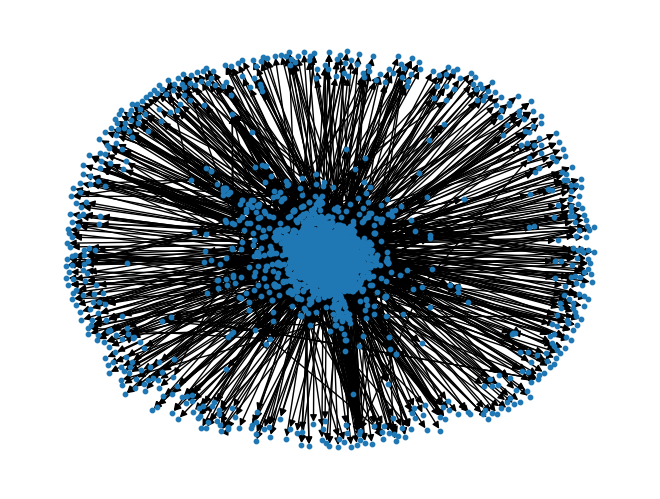

In [4]:
#visulization the dataset
G = nx.from_pandas_edgelist(df_alph, source='SOURCE', target='TARGET',edge_attr='RATING',create_using=nx.DiGraph())
nx.draw(G,pos=nx.spring_layout(G),with_labels=False,node_size=10)

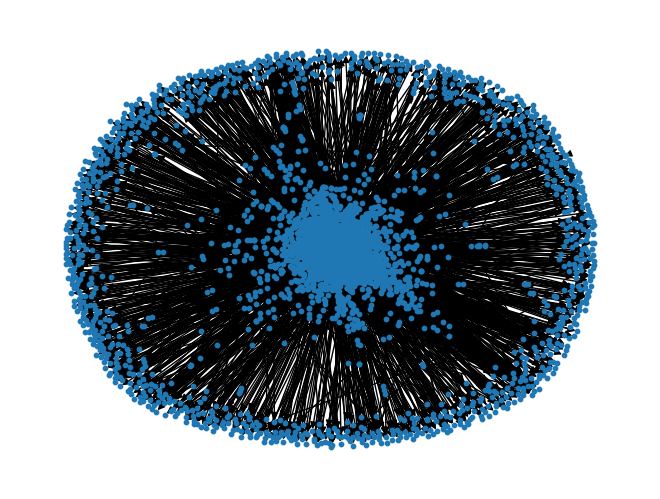

In [117]:
G_otc = nx.from_pandas_edgelist(df_otc, source='SOURCE', target='TARGET',edge_attr='RATING',create_using=nx.DiGraph())
nx.draw(G_otc,pos=nx.spring_layout(G_otc),with_labels=False,node_size=10)

### Basic analysis
count the number of nodes,number of edges,density of graph,rating distribution :

There are 3783 nodes, 24186 edges. The density of graph is 0.0016904649973936393, that means this network has a very low density. According to the bar chart of rating distribution, it is obvious that there is no 0 rating,the majority rating are positive. 


In [5]:
#count the number of nodes
G.number_of_nodes()

3783

In [118]:
G_otc.number_of_nodes()

5881

In [6]:
#count the number of edges
G.number_of_edges()

24186

In [119]:
G_otc.number_of_edges()

35592

In [88]:
#compute the density of graph
nx.density(G)

0.0016904649973936393

In [120]:
nx.density(G_otc)

0.0010292571373048454

In [121]:
nx.is_directed_acyclic_graph(G)

False

In [84]:
nx.is_strongly_connected(G)

False

In [85]:
nx.is_weakly_connected(G)

False

<BarContainer object of 20 artists>

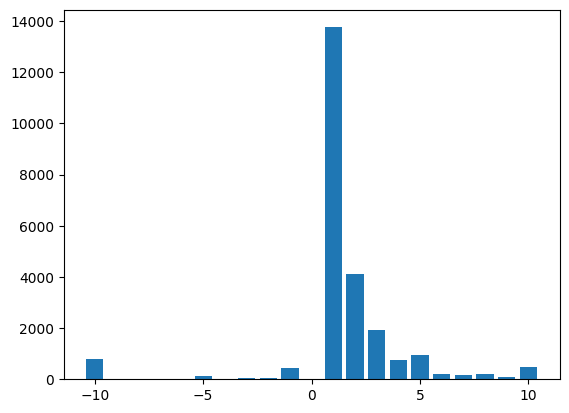

In [105]:
#统计rating列值的分布并可视化-alpha
rating_count=df_alph['RATING'].value_counts()
a=rating_count.sort_index(ascending=False)

a = {'rating':a.index,'counts':a.values}
rating_count_alpha = pd.DataFrame(a)
plt.bar(rating_count_alpha['rating'],rating_count_alpha['counts'])

<BarContainer object of 20 artists>

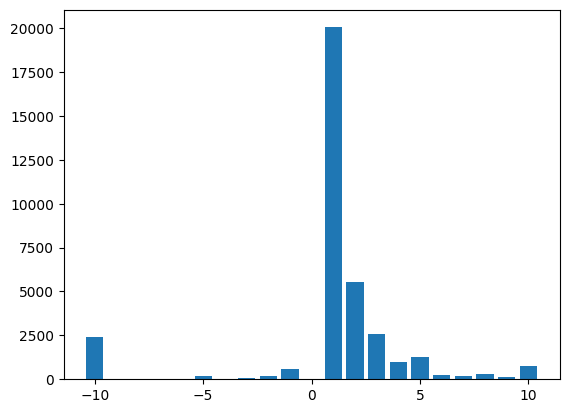

In [106]:
#otc
rating_count=df_otc['RATING'].value_counts()
a=rating_count.sort_index(ascending=False)

a = {'rating':a.index,'counts':a.values}
rating_count_otc = pd.DataFrame(a)
plt.bar(rating_count_otc['rating'],rating_count_otc['counts'])

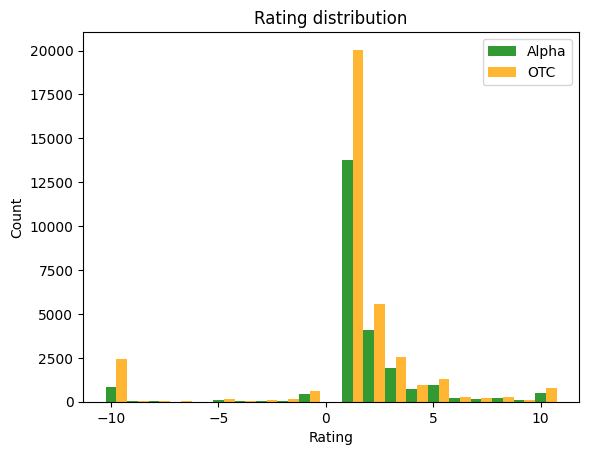

In [116]:
bar_width=0.5

plt.bar(x=rating_count_alpha['rating'], height=rating_count_alpha['counts'], label='Alpha',
color='green', alpha=0.8, width=bar_width)

plt.bar(x=rating_count_otc['rating']+bar_width, height=rating_count_otc['counts'],
label='OTC', color='orange', alpha=0.8, width=bar_width)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Degree distribution')

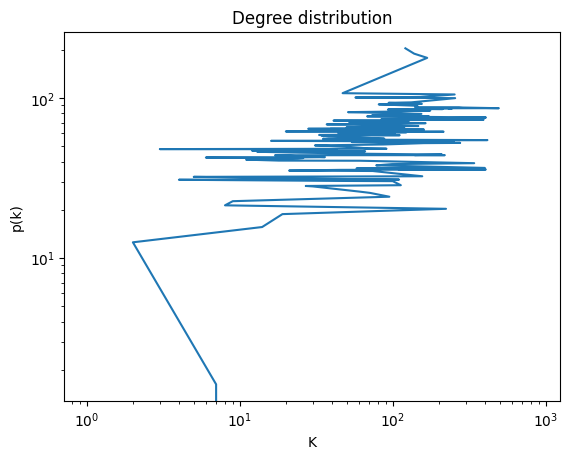

In [94]:
# av_degree_con=nx.average_degree_connectivity(G, weight='RATING')
# plt.loglog(av_degree_con.keys(),sorted(av_degree_con.values())) 

# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlabel("K")
# plt.ylabel("p(k)")
# plt.title("Degree distribution")

### Degree distribution 

the average of degree is 1110.6805445413693


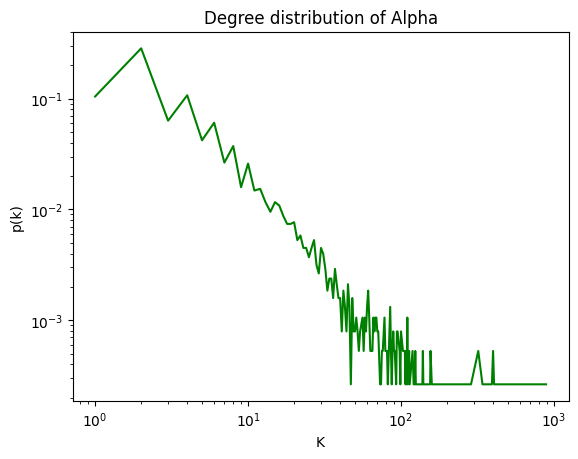

In [128]:
#degree distribution
G_degrees = [G.degree(i) for i in G.nodes()]
G_degree_num=list(np.unique(G_degrees))
G_desity_list=[]
for i in G_degree_num:
    degree_count=G_degrees.count(i)
    density = degree_count/len(G_degrees)
    G_desity_list.append(density)
# plt.plot(G_degree_num,G_desity_list,'-') 
plt.loglog(G_degree_num,G_desity_list,'g' ) 

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("K")
plt.ylabel("p(k)")
plt.title("Degree distribution of Alpha")

print('the average of degree is', np.mean(G.degree()))

the average of in-degree is 1107.4838752312978
the average of out-degree is 1107.4838752312978


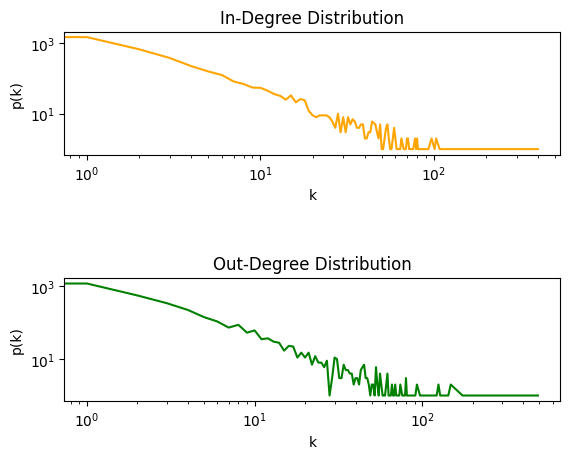

In [124]:
#In-degree distribution
in_degrees = G.in_degree()
in_degrees=dict(in_degrees)
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]

plt.subplot(2,1,1)
plt.loglog(in_values, in_hist,'orange' ) 
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('In-Degree Distribution')

#out-degree distribution
out_degrees = G.out_degree()
out_degrees=dict(out_degrees)
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]

plt.subplots_adjust(wspace =2, hspace =1)
plt.subplot(2,1,2)
plt.loglog(out_values, out_hist,'g' ) 
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Out-Degree Distribution')

print('the average of in-degree is', np.mean(G.in_degree()))
print('the average of out-degree is', np.mean(G.out_degree()))

the average of degree is 1110.6805445413693


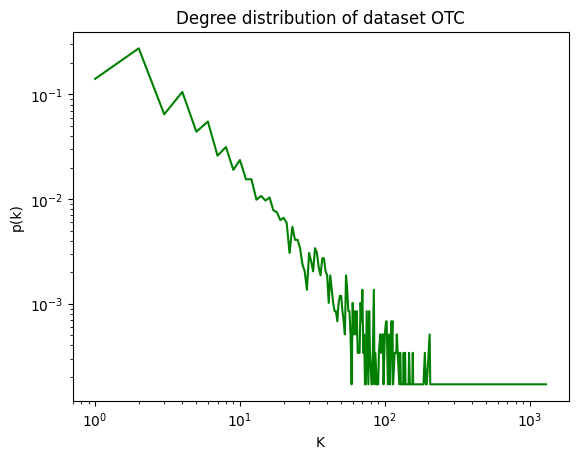

In [126]:
G_degrees = [G_otc.degree(i) for i in G_otc.nodes()]
G_degree_num=list(np.unique(G_degrees))
G_desity_list=[]
for i in G_degree_num:
    degree_count=G_degrees.count(i)
    density = degree_count/len(G_degrees)
    G_desity_list.append(density)
# plt.plot(G_degree_num,G_desity_list,'-') 
plt.loglog(G_degree_num,G_desity_list,'g' ) 

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("K")
plt.ylabel("p(k)")
plt.title("Degree distribution of dataset OTC")

print('the average of degree is', np.mean(G.degree()))

the average of in-degree is 1107.4838752312978
the average of out-degree is 1107.4838752312978


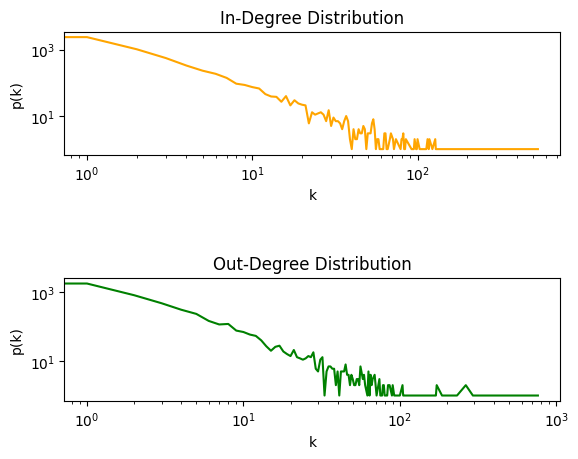

In [125]:
#In-degree distribution
in_degrees = G_otc.in_degree()
in_degrees=dict(in_degrees)
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]

plt.subplot(2,1,1)
plt.loglog(in_values, in_hist,'orange' ) 
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('In-Degree Distribution')

#out-degree distribution
out_degrees = G_otc.out_degree()
out_degrees=dict(out_degrees)
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]

plt.subplots_adjust(wspace =2, hspace =1)
plt.subplot(2,1,2)
plt.loglog(out_values, out_hist,'g' ) 
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Out-Degree Distribution')

print('the average of in-degree is', np.mean(G.in_degree()))
print('the average of out-degree is', np.mean(G.out_degree()))


### Centrality correlation
Centralization is high if relationships are concentrated on a single unit and low if they are distributed evenly across units.

A node's degree centrality C$_D$(i) reflects its number of relationships,

A closeness measure conceives of a unit as central to the extent that it is related to other units via short geodesics

eigenvector centrality defines a unit's power or prominence pi on the basis of the strength of its relationships to other powerful or prominent units

In [42]:
def compute_centrality(g):
    degree_centralities = nx.degree_centrality(g)
    in_degree_centralities=nx.in_degree_centrality(G) 
    out_degree_centralities=nx.out_degree_centrality(G)
    close_centralities = nx.closeness_centrality(g)
    between_centralities = nx.betweenness_centrality(g)
    eigenvector_centralities = nx.eigenvector_centrality(g)
    return degree_centralities,in_degree_centralities,out_degree_centralities,close_centralities, between_centralities, eigenvector_centralities

In [43]:
degree_centralities,in_degree_centralities,out_degree_centralities,close_centralities, between_centralities, eigenvector_centralities=compute_centrality(G)

In [68]:
# print(f"degree_centralities is {degree_centralities}")
# print(f"close_centralities is {close_centralities}" )
# print(f"between_centralities is {between_centralities}" )
# print(f"eigenvector_centralities is{eigenvector_centralities} ")

Text(0, 0.5, 'eigenvector_centrality')

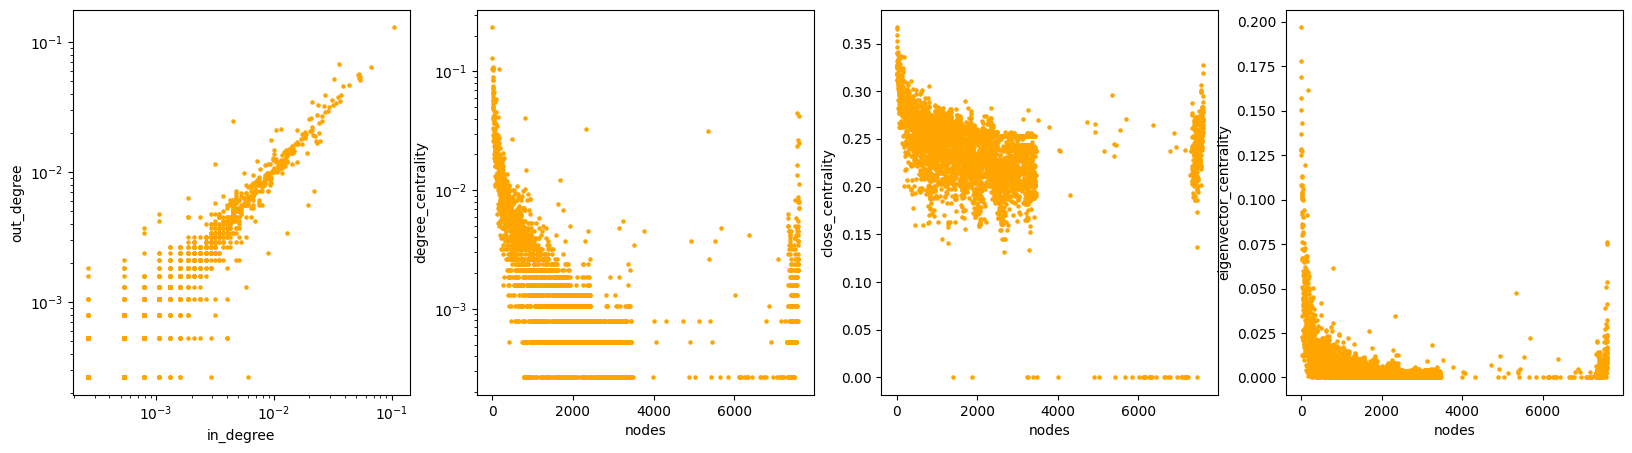

In [134]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].scatter(in_degree_centralities.values(),out_degree_centralities.values(),color='orange',s=5)
axs[0].set_xscale('log')
axs[0].set_xlabel('in_degree')
axs[0].set_yscale('log')
axs[0].set_ylabel('out_degree')

axs[1].scatter(degree_centralities.keys(),degree_centralities.values(),color='orange',s=5)
axs[1].set_xlabel('nodes')
axs[1].set_yscale('log')
axs[1].set_ylabel('degree_centrality')

axs[2].scatter(close_centralities.keys(),close_centralities.values(),color='orange',s=5)
axs[2].set_xscale('linear')
axs[2].set_xlabel('nodes')
axs[2].set_yscale('linear')
axs[2].set_ylabel('close_centrality')


axs[3].scatter(eigenvector_centralities.keys(),eigenvector_centralities.values(),color='orange',s=5)
axs[3].set_xscale('linear')
axs[3].set_xlabel('nodes')
axs[3].set_yscale('linear')
axs[3].set_ylabel('eigenvector_centrality')


Text(0, 0.5, 'out_degree')

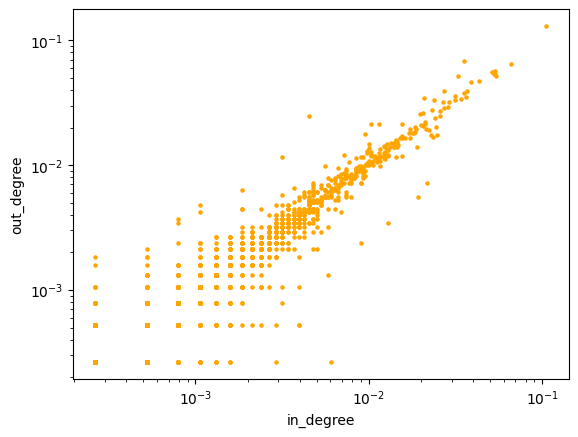

In [78]:
plt.scatter(in_degree_centralities.values(),out_degree_centralities.values(),color='orange',s=5)
# plt.title('Centrality Correlation between in_degree and out_degree centrality')
plt.xscale('log')
plt.xlabel('in_degree')
plt.yscale('log')
plt.ylabel('out_degree')

Text(0, 0.5, 'degree_centrality')

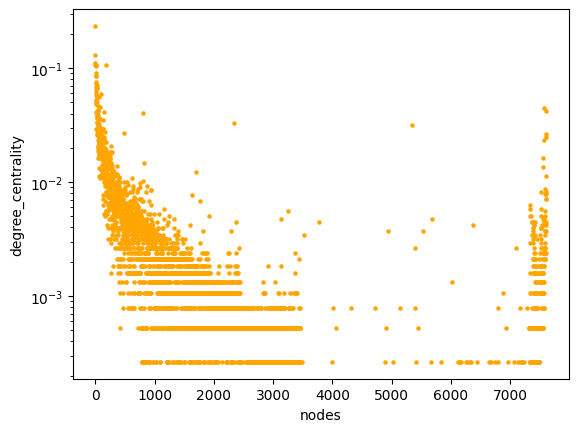

In [79]:

plt.subplots_adjust(wspace =1, hspace =0)
plt.scatter(degree_centralities.keys(),degree_centralities.values(),color='orange',s=5)
plt.xscale('linear')
plt.xlabel('nodes')
plt.yscale('log')
plt.ylabel('degree_centrality')

Text(0, 0.5, 'close_centrality')

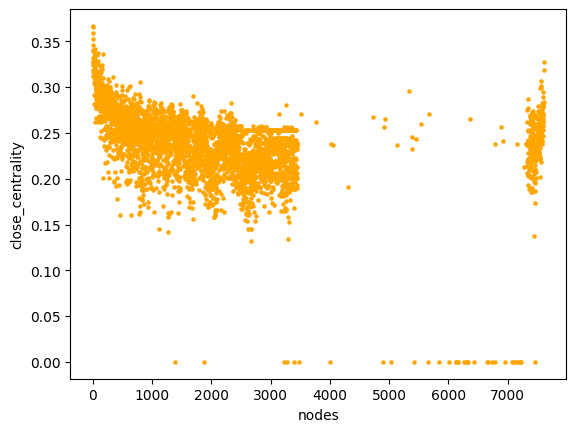

In [80]:
plt.subplots_adjust(wspace =1, hspace =0)
plt.scatter(close_centralities.keys(),close_centralities.values(),color='orange',s=5)
plt.xscale('linear')
plt.xlabel('nodes')
plt.yscale('linear')
plt.ylabel('close_centrality')

Text(0, 0.5, 'eigenvector_centrality')

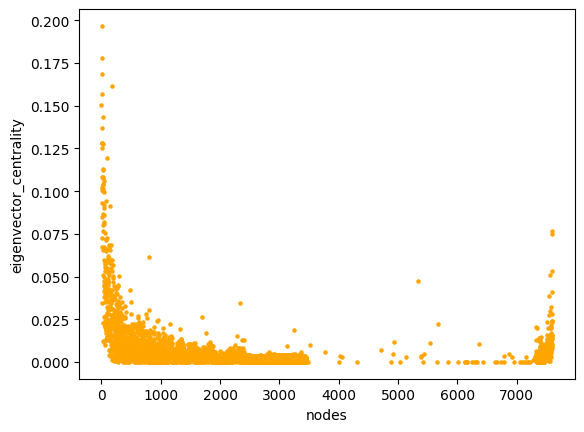

In [81]:
plt.subplots_adjust(wspace =1, hspace =0)
plt.scatter(eigenvector_centralities.keys(),eigenvector_centralities.values(),color='orange',s=5)
plt.xscale('linear')
plt.xlabel('nodes')
plt.yscale('linear')
plt.ylabel('eigenvector_centrality')

In [129]:
# G_rnd = nx.algorithms.smallworld.random_reference(G, niter = 20, connectivity=False)

### whether this is a small world network?


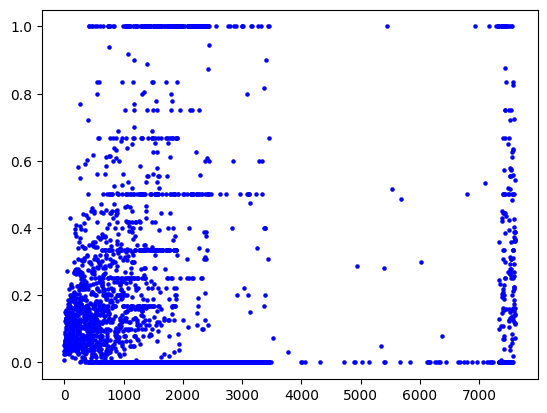

In [24]:
#clustering coeffecient 
c_g=nx.clustering(G)
c_g
plt.scatter(c_g.keys(),c_g.values(),color='blue',s=5,label = 'C(i)')

In [25]:
c_avg_g=nx.average_clustering(G)
c_avg_g

0.15834486458303135

In [82]:
#the shortest-path length
r_ASPL =nx.average_shortest_path_length(G)
r_ASPL

NetworkXError: Graph is not weakly connected.

### Directed Binary CM & DBEM

In [ ]:
DBCM_graphs = []

for i, G in enumerate(graph_list):
    DBCM_graphs.append(DirectedGraph(nx.to_numpy_array(G)))
    DBCM_graphs[i].solve_tool(model="dcm_exp")
    
for i, G in enumerate(graph_list):
    DBCM_graphs[i].ensemble_sampler(30, cpu_n=8, output_dir="samples/DBCM_samples/{}/".format(i))
        